Course : programming Machine Learning Application 
Instructor : Hubbard, David
Assignment 1: Data Preprocessing and Analysis
student name: Kinjal Kathiriya (2185566)


In [1]:
#pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
import pandas as pd

# Load the dataset from the specified CSV file and display it
df = pd.read_csv('adult_demo_final_2022531.csv')
display(df)


POPULATION_NAME  FISCAL_YEAR  \
0                      Alameda         2015   
1                      Alameda         2015   
2                      Alameda         2015   
3                      Alameda         2015   
4                      Alameda         2015   
5                      Alameda         2015   
6                      Alameda         2015   
7                      Alameda         2015   
8                      Alameda         2015   
9                      Alameda         2015   
10                     Alameda         2015   
11                     Alameda         2015   
12                     Alameda         2015   
13                     Alameda         2016   
14                     Alameda         2016   
15                     Alameda         2016   
16                     Alameda         2016   
17                     Alameda         2016   
18                     Alameda         2016   
19                     Alameda         2016   
20                     Alameda         2016   
21                     Alameda         2016   
22                     Alameda         2016   
23                     Alameda         2016   
24                     Alameda         2016   
25                     Alameda         2016   
26                     Alameda         2016   
27                     Alameda         2017   
28                     Alameda         2017   
29                     Alameda         2017   
30                     Alameda         2017   
31                     Alameda         2017   
32                     Alameda         2017   
33                     Alameda         2017   
34                     Alameda         2017   
35                     Alameda         2017   
36                     Alameda         2017   
37                     Alameda         2017   
38                     Alameda         2017   
39                     Alameda         2017   
40                     Alameda         2018   
41                     Alameda         2018   
42                     Alameda         2018   
43                     Alameda         2018   
44                     Alameda         2018   
45                     Alameda         2018   
46                     Alameda         2018   
47                     Alameda         2018   
48                     Alameda         2018   
49                     Alameda         2018   
50                     Alameda         2018   
51                     Alameda         2018   
52                     Alameda         2018   
53                     Alameda         2019   
54                     Alameda         2019   
55                     Alameda         2019   
56                     Alameda         2019   
57                     Alameda         2019   
58                     Alameda         2019   
59                     Alameda         2019   
60                     Alameda         2019   
61                     Alameda         2019   
62                     Alameda         2019   
63                     Alameda         2019   
64                     Alameda         2019   
65                     Alameda         2019   
66                     Alameda         2020   
67                     Alameda         2020   
68                     Alameda         2020   
69                     Alameda         2020   
70                     Alameda         2020   
71                     Alameda         2020   
72                     Alameda         2020   
73                     Alameda         2020   
74                     Alameda         2020   
75                     Alameda         2020   
76                     Alameda         2020   
77                     Alameda         2020   
78                     Alameda         2020   
79                     Alameda         2021   
80                     Alameda         2021   
81                     Alameda         2021   
82                     Alameda         2021   
83                     Alameda         2021   
84                  

Answer : 1.	[10 pts] Download the data set https://data.chhs.ca.gov/dataset/adult-population-performance-dashboard/resource/9ba5d69e-4cca-4dff-8e04-08b6a536daf3 and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes

In [73]:
# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

POPULATION_NAME  FISCAL_YEAR                              DEMO_GRP  \
0         Alameda         2015                       A1 Adults 21-44   
1         Alameda         2015                       A2 Adults 45-64   
2         Alameda         2015                         A3 Adults 65+   
3         Alameda         2015  R1 Alaskan Native or American Indian   
4         Alameda         2015          R2 Asian or Pacific Islander   

   TOTAL_CT  TOTAL_CT_ANNOT  SMHS1_CT  SMHS1_CT_ANNOT  SMHS5_CT  \
0  131186.0             NaN    6586.0             NaN    3778.0   
1   91014.0             NaN    6414.0             NaN    3848.0   
2   52042.0             NaN     825.0             NaN     520.0   
3     962.0             NaN      61.0             NaN      39.0   
4   75955.0             NaN    1634.0             NaN    1054.0   

   SMHS5_CT_ANNOT  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [74]:
# Display a summary of the DataFrame, including the number of non-null entries, column types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   POPULATION_NAME  5826 non-null   object 
 1   FISCAL_YEAR      5826 non-null   int64  
 2   DEMO_GRP         5826 non-null   object 
 3   TOTAL_CT         5767 non-null   float64
 4   TOTAL_CT_ANNOT   59 non-null     float64
 5   SMHS1_CT         5276 non-null   float64
 6   SMHS1_CT_ANNOT   550 non-null    float64
 7   SMHS5_CT         5050 non-null   float64
 8   SMHS5_CT_ANNOT   776 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 409.8+ KB


In [75]:
import numpy as np

# Select numeric columns from the DataFrame and calculate summary statistics for those columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nSummary Statistics for Numeric Attributes:")
print(df[numeric_columns].describe())




Summary Statistics for Numeric Attributes:
       FISCAL_YEAR      TOTAL_CT  TOTAL_CT_ANNOT       SMHS1_CT  \
count  5826.000000  5.767000e+03       59.000000    5276.000000   
mean   2017.999313  1.270932e+05        1.050847    5448.054208   
std       2.000172  5.334290e+05        0.221572   21696.440805   
min    2015.000000  1.100000e+01        1.000000       0.000000   
25%    2016.000000  1.342000e+03        1.000000     110.000000   
50%    2018.000000  9.306000e+03        1.000000     508.000000   
75%    2020.000000  4.628250e+04        1.000000    2132.250000   
max    2021.000000  9.311597e+06        2.000000  347178.000000   

       SMHS1_CT_ANNOT       SMHS5_CT  SMHS5_CT_ANNOT  
count      550.000000    5050.000000      776.000000  
mean         1.094545    3552.161188        1.131443  
std          0.292852   13868.926860        0.338102  
min          1.000000       0.000000        1.000000  
25%          1.000000      80.000000        1.000000  
50%          1.000000 

In [76]:
# Step 4: Frequencies for Categorical Attributes

# Select categorical columns from the DataFrame and display the frequency counts for each category
categorical_columns = df.select_dtypes(include='object').columns
print("\nFrequencies for Categorical Attributes:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Frequencies for Categorical Attributes:

Column: POPULATION_NAME
POPULATION_NAME
Alameda                     92
Large Counties              92
Statewide                   92
Butte                       91
Contra Costa                91
Colusa                      91
Del Norte                   91
Amador                      91
Imperial                    91
Fresno                      91
Glenn                       91
Humboldt                    91
Kern                        91
Inyo                        91
Kings                       91
Calaveras                   91
Mendocino                   91
Lake                        91
Lassen                      91
Los Angeles                 91
Madera                      91
Marin                       91
Mariposa                    91
Medium Counties             91
Monterey                    91
Merced                      91
Modoc                       91
Mono                        91
Nevada                      91
Napa               

Answer : 2.	[10 pts] For only the  numeric attributes ,  display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of SMHS1_CT vs. TOTAL_CT then print the correlation coefficient between the 2.

In [78]:
# Define a list of column names that represent numeric attributes for analysis
numeric_columns = ['FISCAL_YEAR', 'TOTAL_CT', 'SMHS1_CT', 'SMHS5_CT']


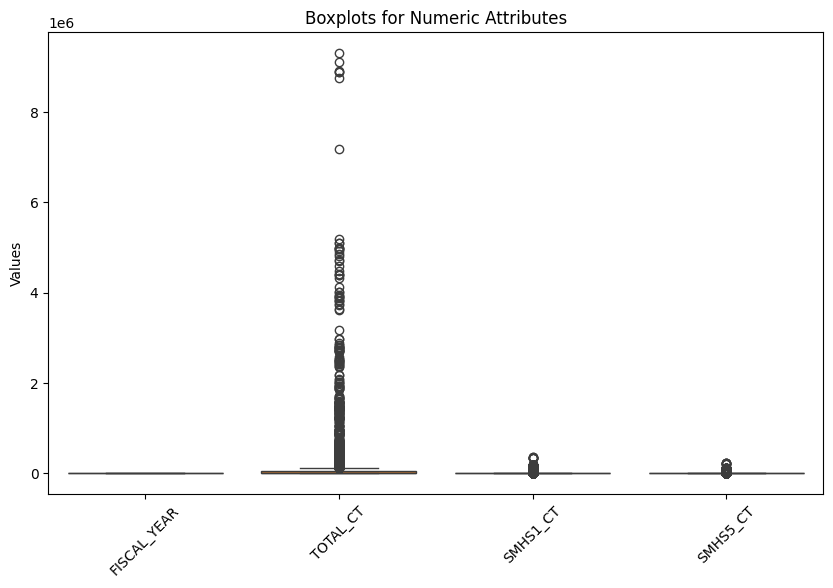

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots to visualize the distribution and detect outliers for the numeric attributes
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df[numeric_columns])  
plt.title('Boxplots for Numeric Attributes')  
plt.ylabel('Values') 
plt.xticks(rotation=45)  
plt.show()  



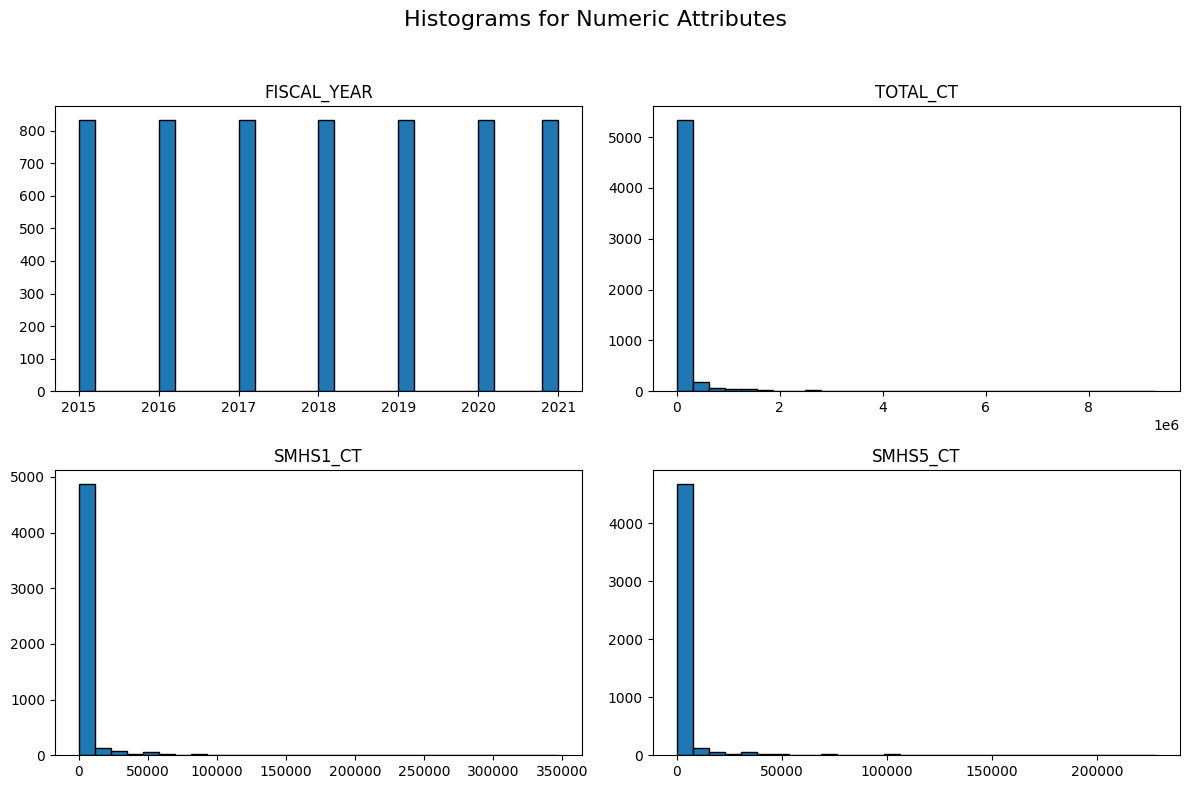

In [81]:
# Create histograms to visualize the distribution of the numeric attributes
df[numeric_columns].hist(bins=30, figsize=(12, 8), grid=False, edgecolor='black')  
plt.suptitle('Histograms for Numeric Attributes', fontsize=16)  
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()  



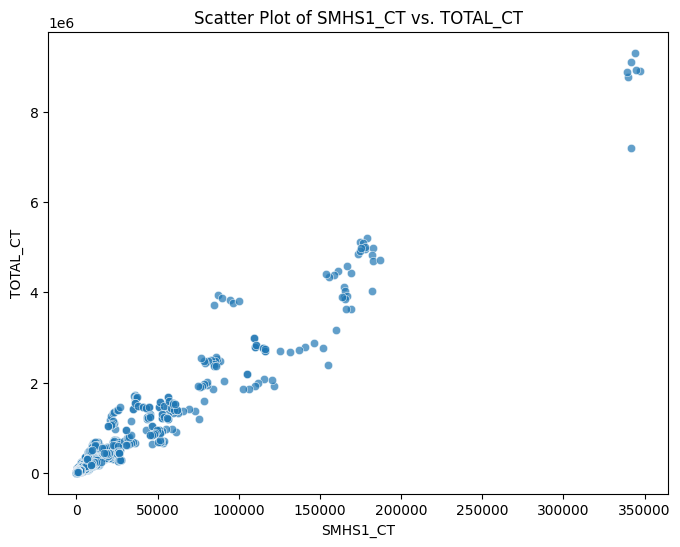

In [82]:
# Create a scatter plot to visualize the relationship between 'SMHS1_CT' and 'TOTAL_CT'
plt.figure(figsize=(8, 6))  
sns.scatterplot(x='SMHS1_CT', y='TOTAL_CT', data=df, alpha=0.7)  
plt.title('Scatter Plot of SMHS1_CT vs. TOTAL_CT')  
plt.xlabel('SMHS1_CT')  
plt.ylabel('TOTAL_CT') 
plt.show()  



In [83]:
# Compute the correlation coefficient between 'SMHS1_CT' and 'TOTAL_CT'
correlation = df[['SMHS1_CT', 'TOTAL_CT']].corr().iloc[0, 1]
print(f"Correlation coefficient between SMHS1_CT and TOTAL_CT: {correlation:.4f}")

Correlation coefficient between SMHS1_CT and TOTAL_CT: 0.9791


Answer : 3. [10 pts] For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g population name and demo group). Ideally, you should use bar charts in a single figure similar to this figure.  Is this a stratified sample?

In [84]:
# Define a list of categorical attribute columns for analysis
categorical_columns = ['POPULATION_NAME', 'FISCAL_YEAR', 'DEMO_GRP']

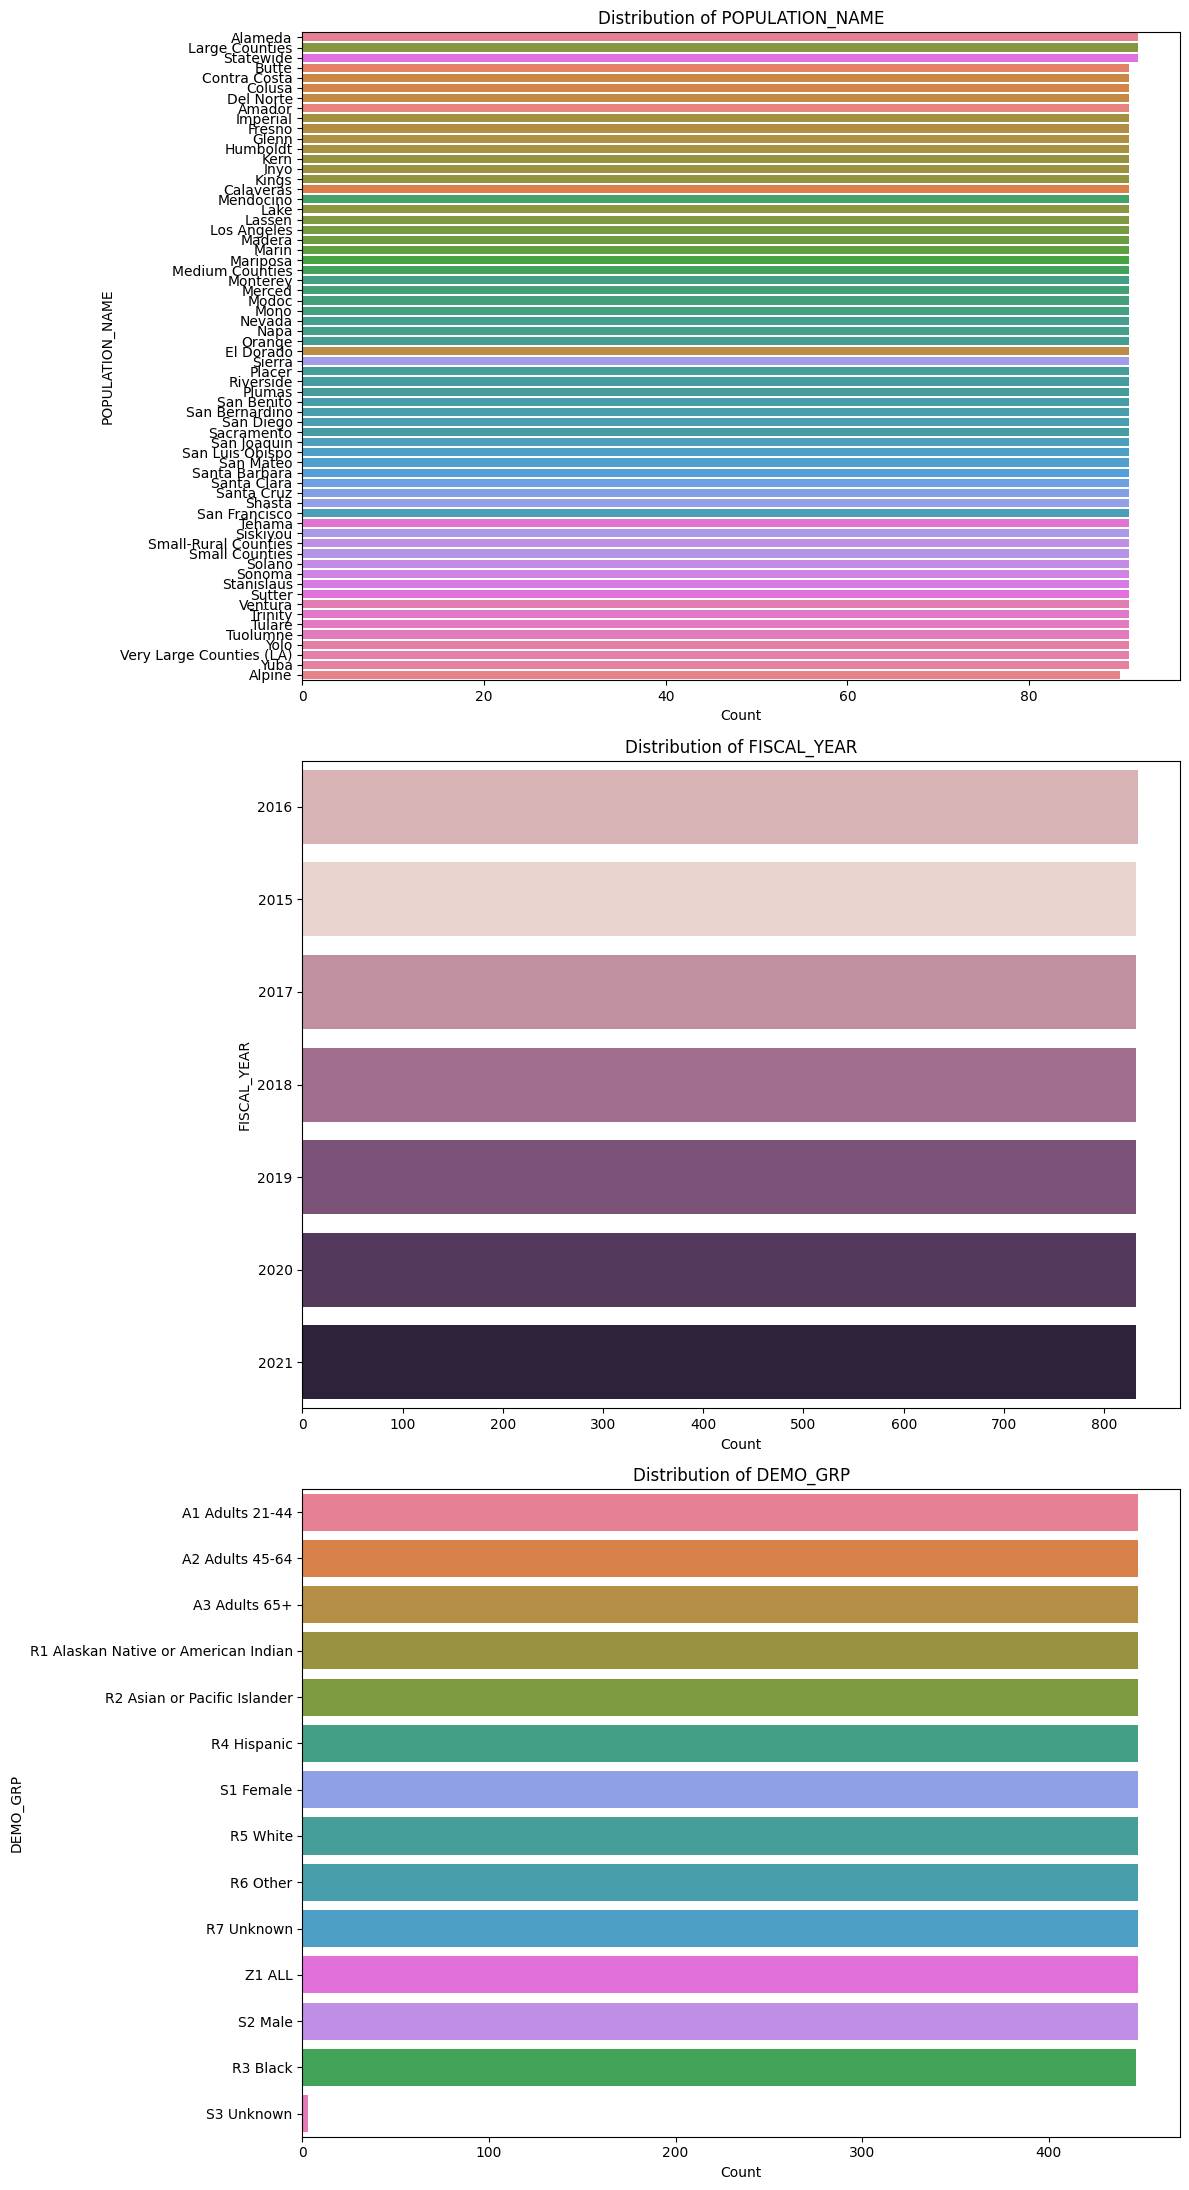

In [85]:
# Plot bar charts for each categorical attribute to visualize their distribution
plt.figure(figsize=(12, 22))

# Loop through each categorical column and plot a countplot for its distribution
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Answer : 4.	 [10 pts] Perform an analysis of each of the population name and the demo group attributes with the SMHS1_CT attribute. Show the resulting  bar charts to visualize the relationships between these pairs of attributes. I.E. Look at the mean value of SMHS1_CT per demo group and then mean value of SMHS1_CT per population name. Don't use cross tabulation as there are too many categories and the only way to make sense of it is with a bar graph. [Hint: you can use aggregation functions in Pandas such as groupby()  then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. Just discuss one large pattern or lack of a pattern.

In [86]:
# Calculate the mean value of 'SMHS1_CT' for each category in the 'DEMO_GRP' column and sort the results
demo_group_means = df.groupby('DEMO_GRP')['SMHS1_CT'].mean().sort_values()

In [87]:
# Calculate the mean value of 'SMHS1_CT' for each category in the 'POPULATION_NAME' column and sort the results
population_name_means = df.groupby('POPULATION_NAME')['SMHS1_CT'].mean().sort_values()


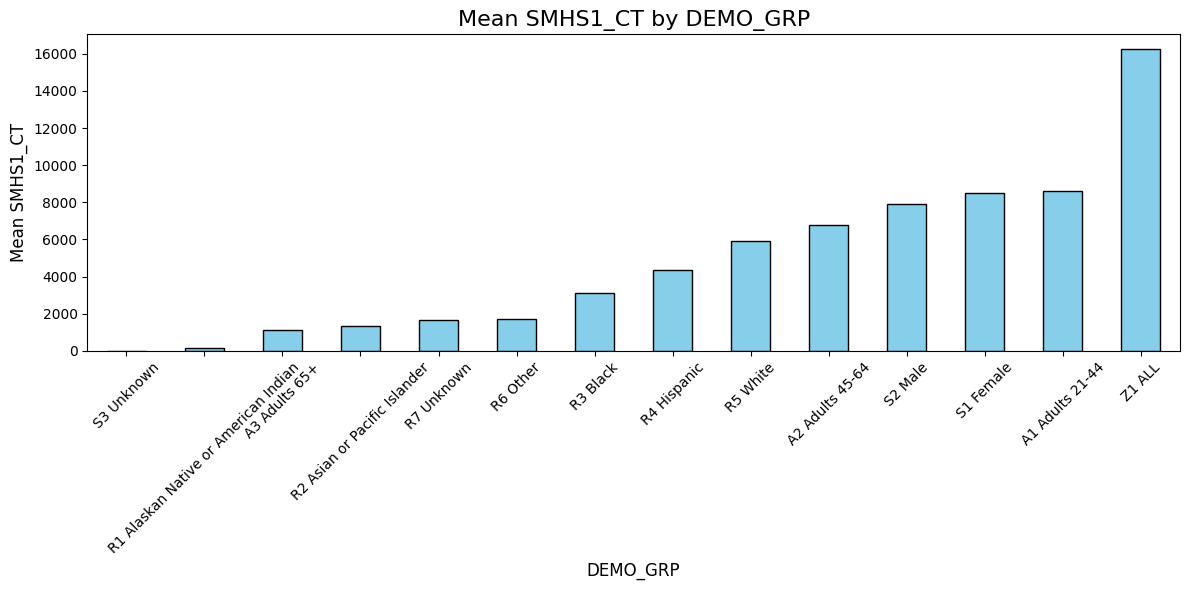

In [88]:
# Plot a bar chart to visualize the mean 'SMHS1_CT' values for each 'DEMO_GRP'
plt.figure(figsize=(12, 6))
demo_group_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean SMHS1_CT by DEMO_GRP', fontsize=16)
plt.xlabel('DEMO_GRP', fontsize=12)
plt.ylabel('Mean SMHS1_CT', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

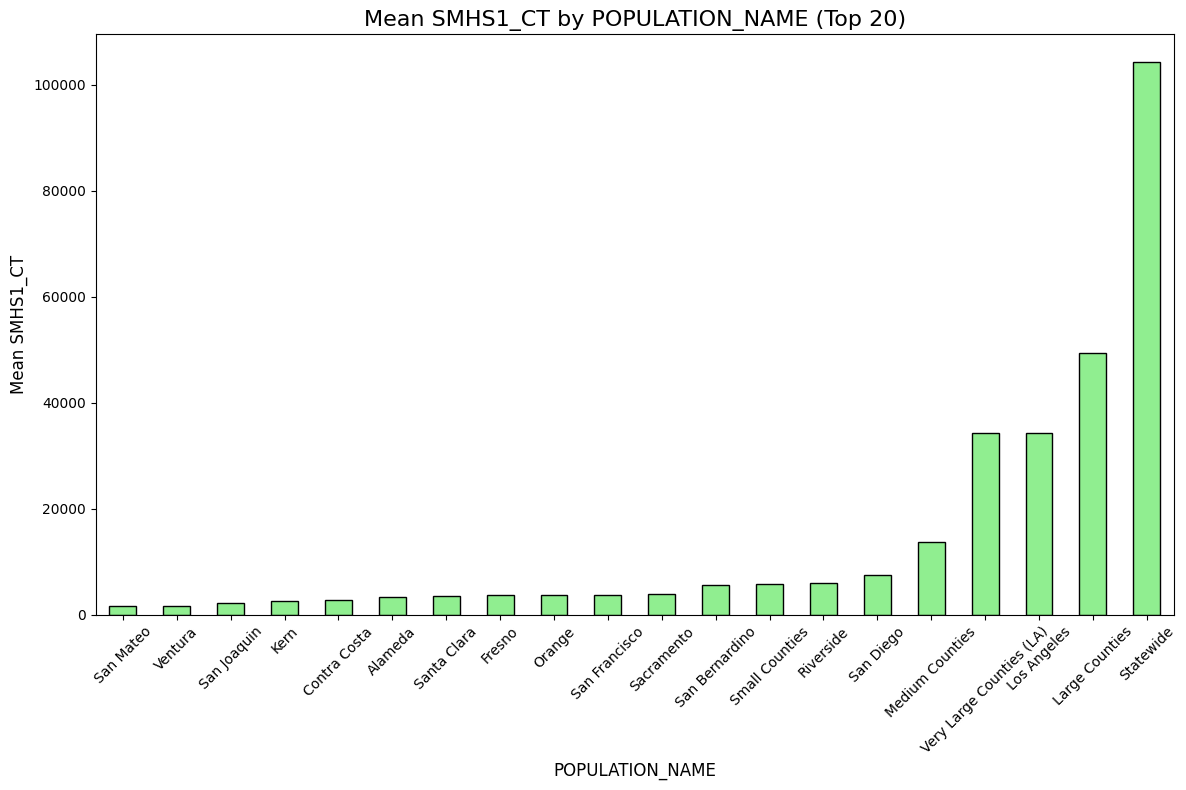

In [89]:
# Plot a bar chart to visualize the mean 'SMHS1_CT' values for the top 20 'POPULATION_NAME' categories (for better readability)
plt.figure(figsize=(12, 8))
population_name_means.tail(20).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Mean SMHS1_CT by POPULATION_NAME (Top 20)', fontsize=16)
plt.xlabel('POPULATION_NAME', fontsize=12)
plt.ylabel('Mean SMHS1_CT', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Answer : 5.	[10  pts] Convert the data into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record. The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called df_Numeric.csv or as an Excel file called df_Numeric.xlsx.

In [90]:
# Identify categorical columns (those with 'object' data type) and numeric columns (those with numeric data types)
categorical_columns = df.select_dtypes(include='object').columns
numeric_columns = df.select_dtypes(include=['number']).columns

In [91]:
# Convert categorical attributes to dummy variables (one-hot encoding), keeping all categories (drop_first=False)
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=False)


In [92]:
# Display the top 10 rows of the new dataframe with dummy variables
print("Top 10 rows of the new dataframe:")
print(df_dummies.head(10))

Top 10 rows of the new dataframe:
   FISCAL_YEAR  TOTAL_CT  TOTAL_CT_ANNOT  SMHS1_CT  SMHS1_CT_ANNOT  SMHS5_CT  \
0         2015  131186.0             NaN    6586.0             NaN    3778.0   
1         2015   91014.0             NaN    6414.0             NaN    3848.0   
2         2015   52042.0             NaN     825.0             NaN     520.0   
3         2015     962.0             NaN      61.0             NaN      39.0   
4         2015   75955.0             NaN    1634.0             NaN    1054.0   
5         2015   56809.0             NaN    4247.0             NaN    2321.0   
6         2015   41775.0             NaN    1433.0             NaN     858.0   
7         2015   46735.0             NaN    3396.0             NaN    2032.0   
8         2015   30389.0             NaN    1249.0             NaN     712.0   
9         2015   21617.0             NaN    1805.0             NaN    1130.0   

   SMHS5_CT_ANNOT  POPULATION_NAME_Alameda  POPULATION_NAME_Alpine  \
0             N

In [93]:
# Save the resulting dataframe with dummy variables to a CSV file (without the index column)
csv_file_path = 'df_Numeric.csv'
df_dummies.to_csv(csv_file_path, index=False)


In [94]:
# Save the resulting dataframe with dummy variables to an Excel file (without the index column)
excel_file_path = 'df_Numeric.xlsx'
df_dummies.to_excel(excel_file_path, index=False)

In [95]:
# Print a message confirming that the data has been saved to both the CSV and Excel files
print(f"\nData saved to {csv_file_path} and {excel_file_path}")  



Data saved to df_Numeric.csv and df_Numeric.xlsx


Answer : 6.	[20 pts]  Create a copy of your original dataframe for Problem 6.  Example: dfCopy=dfOriginalData.copy().  Take the dependent variable SMHS1_CT and discretize into 3 quantiles using the the Pandas Qcut function.  The column name will be SMHS1_CT_Quantile.  Name the quantiles 'Lowest33Pct', 'Middle33Pct' and 'Highest33Pct'. How do we do this?  Break it into 3 quantiles with the following command dfOriginalData['SMHS1_CT_Quantile'] = pd.qcut(dfOriginalData['SMHS1_CT'], q=3, labels=['Lowest33Pct', 'Middle33Pct','Highest33Pct']).  Create 2 filtered dataframes where one is for the city of San Francisco and the other dataframe is for Shasta.  For each dataframe, group by 'SMHS1_CT_Quantile and do a count of DEMO_GRP_A2 Adults 45-64.   Do you see a different distributional pattern for small area such as Shasta verses a populated area such as San Francisco?

In [96]:
# Create a new column 'SMHS1_CT_Quantile' to categorize 'SMHS1_CT' into three quantiles (Low, Middle, High)
df['SMHS1_CT_Quantile'] = pd.qcut(df['SMHS1_CT'], q=3, 
                                   labels=['Lowest33Pct', 'Middle33Pct', 'Highest33Pct'])  # Divide 'SMHS1_CT' into 3 quantiles


In [97]:
# Filter the dataframe for San Francisco and Shasta populations
sf_data = df[df['POPULATION_NAME'] == 'San Francisco']
shasta_data = df[df['POPULATION_NAME'] == 'Shasta']

In [98]:
# San Francisco: Count occurrences of each combination of SMHS1_CT_Quantile and DEMO_GRP
sf_counts = sf_data.groupby(['SMHS1_CT_Quantile', 'DEMO_GRP'], observed=True).size()  

# Shasta: Count occurrences of each combination of SMHS1_CT_Quantile and DEMO_GRP
shasta_counts = shasta_data.groupby(['SMHS1_CT_Quantile', 'DEMO_GRP'], observed=True).size()  


In [99]:
# Display the counts for San Francisco and Shasta
print("San Francisco counts by quantile:")  
print(sf_counts)

print("\nShasta counts by quantile:")  
print(shasta_counts)


San Francisco counts by quantile:
SMHS1_CT_Quantile  DEMO_GRP                            
Lowest33Pct        R1 Alaskan Native or American Indian    7
Middle33Pct        R4 Hispanic                             3
                   R7 Unknown                              6
Highest33Pct       A1 Adults 21-44                         7
                   A2 Adults 45-64                         7
                   A3 Adults 65+                           7
                   R2 Asian or Pacific Islander            7
                   R3 Black                                7
                   R4 Hispanic                             4
                   R5 White                                7
                   R6 Other                                7
                   R7 Unknown                              1
                   S1 Female                               7
                   S2 Male                                 7
                   Z1 ALL                               

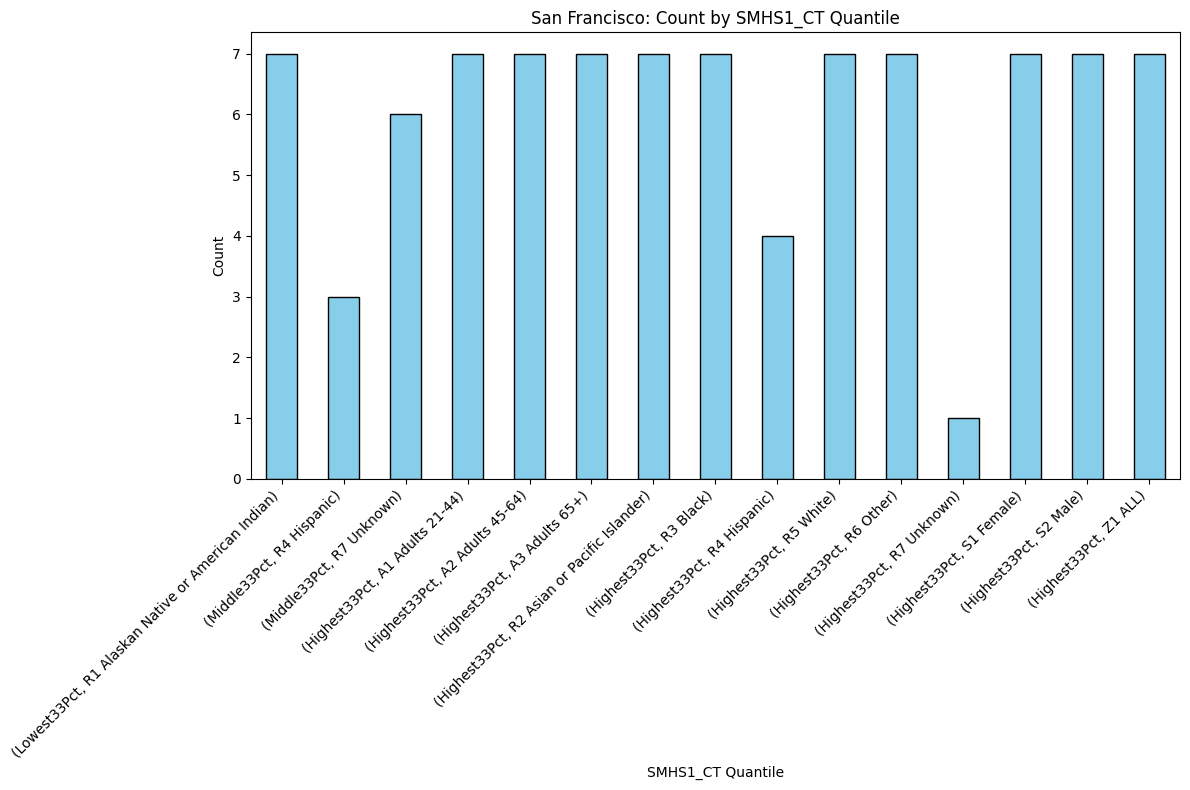

In [100]:
# Bar plot for San Francisco: Visualize the count distribution by SMHS1_CT quantile
plt.figure(figsize=(12, 8))  
sf_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('San Francisco: Count by SMHS1_CT Quantile')
plt.xlabel('SMHS1_CT Quantile')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()



Answer : 7 [10 pts] Use the original data frame without the quantiles.  First remove (drop) the columns SMHS1_CT_ANNOT,SMHS5_CT,SMHS5_CT_ANNOT, AND 'FISCAL_YEAR'. Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable). [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy]. Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to SMHS1_CT. Repeat this step to display correlations with the attribute DEMO_GRP_A1 Adults 21-44. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.  Note, since this is a large dataframe, you can display all rows by this command pd.set_option('display.max_rows', None).  Also, to not see the entire correlation matrix and only see the sorted correlations for the variable of interest, you follow this example: display(dfCorr[‘SMHS1_CT’]).

In [101]:
# Drop specified columns from the dataframe to reduce the dataset size
columns_to_drop = ['SMHS1_CT_ANNOT', 'SMHS5_CT', 'SMHS5_CT_ANNOT', 'FISCAL_YEAR']
df_reduced = df.drop(columns=columns_to_drop, errors='ignore')


In [102]:
# Filter only numeric columns from the reduced dataframe
numeric_columns = df_reduced.select_dtypes(include='number')

In [103]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

In [104]:
# Correlations with SMHS1_CT
correlations_with_SMHS1_CT = correlation_matrix['SMHS1_CT'].sort_values(ascending=False)  # Sort correlations with SMHS1_CT in descending order
print("Correlations with SMHS1_CT:")
print(correlations_with_SMHS1_CT)


Correlations with SMHS1_CT:
SMHS1_CT          1.000000
TOTAL_CT          0.979051
TOTAL_CT_ANNOT    0.898897
Name: SMHS1_CT, dtype: float64


In [105]:
# Correlations with DEMO_GRP_A1 Adults 21-44
# Replace 'DEMO_GRP_A1 Adults 21-44' with the correct column name if it differs
if 'DEMO_GRP_A1 Adults 21-44' in correlation_matrix.columns:  # Check if the column exists in the correlation matrix
    correlations_with_DEMO_GRP_A1 = correlation_matrix['DEMO_GRP_A1 Adults 21-44'].sort_values(ascending=False)  # Sort correlations with 'DEMO_GRP_A1 Adults 21-44' in descending order
    print("\nCorrelations with DEMO_GRP_A1 Adults 21-44:")
    print(correlations_with_DEMO_GRP_A1)
else:
    print("\nColumn 'DEMO_GRP_A1 Adults 21-44' not found in the dataset.")  # Print a message if the column is not found



Column 'DEMO_GRP_A1 Adults 21-44' not found in the dataset.


In [106]:
# Display the full correlation matrix (optional)
print("\nFull Correlation Matrix:")
pd.set_option('display.max_rows', None) 
print(correlation_matrix)  


Full Correlation Matrix:
                TOTAL_CT  TOTAL_CT_ANNOT  SMHS1_CT
TOTAL_CT        1.000000             NaN  0.979051
TOTAL_CT_ANNOT       NaN        1.000000  0.898897
SMHS1_CT        0.979051        0.898897  1.000000


Answer : 8 [10 pts] Use Min-Max Normalization to transform the values of the attribute SMHS1_CT to the range 0.0-1.0 (without changing the original data). Next, perform zscore normalization to standardize the values of SNHS1_CT (also without changing the original dataframe).  Hint, create a copy of the original dataframe and perform the operations on the new dataframe filtered for only numeric features.  Do not use Sci-kit learn functions and do it on your own.   The following is extra credit (5 Points).  There are only 2 numeric variables in the original dataframe including the variable you just transformed. Next do both in a new dataframe derived from the original for both min-max normalization and zscore normalization for all numeric attributes from the original dataframe in the newly copied and filtered dataframe.

In [107]:
# Create a copy of the original dataframe
df_copy = df.copy() 


In [108]:
# Perform Min-Max Normalization for SMHS1_CT
SMHS1_CT_min = df_copy['SMHS1_CT'].min()  
SMHS1_CT_max = df_copy['SMHS1_CT'].max()  


In [109]:
# Perform Min-Max Normalization and create a new column for the normalized values
df_copy['SMHS1_CT_MinMax'] = (df_copy['SMHS1_CT'] - SMHS1_CT_min) / (SMHS1_CT_max - SMHS1_CT_min)  # Normalize SMHS1_CT and store in new column


In [110]:
# Perform Z-Score Normalization for SMHS1_CT
SMHS1_CT_mean = df_copy['SMHS1_CT'].mean()  
SMHS1_CT_std = df_copy['SMHS1_CT'].std()    


In [111]:
# Perform Z-Score Normalization for SMHS1_CT
df_copy['SMHS1_CT_ZScore'] = (df_copy['SMHS1_CT'] - SMHS1_CT_mean) / SMHS1_CT_std  


In [51]:
# Normalize all numeric attributes
numeric_columns = df_copy.select_dtypes(include='number')  # Select only numeric columns for normalization


In [112]:
# Min-Max Normalization for all numeric attributes
df_copy_minmax = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())  

# Z-Score Normalization for all numeric attributes
df_copy_zscore = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()  

# Add normalized attributes to the dataframe
df_copy_minmax.columns = [col + '_MinMax' for col in numeric_columns.columns]  
df_copy_zscore.columns = [col + '_ZScore' for col in numeric_columns.columns]  

# Combine normalized data back into the original dataframe
df_normalized = pd.concat([df_copy, df_copy_minmax, df_copy_zscore], axis=1)  


In [113]:
# Display the first few rows of the normalized dataframe
print("First 10 rows of the normalized dataframe:")
print(df_normalized.head(10))

First 10 rows of the normalized dataframe:
  POPULATION_NAME  FISCAL_YEAR                              DEMO_GRP  \
0         Alameda         2015                       A1 Adults 21-44   
1         Alameda         2015                       A2 Adults 45-64   
2         Alameda         2015                         A3 Adults 65+   
3         Alameda         2015  R1 Alaskan Native or American Indian   
4         Alameda         2015          R2 Asian or Pacific Islander   
5         Alameda         2015                              R3 Black   
6         Alameda         2015                           R4 Hispanic   
7         Alameda         2015                              R5 White   
8         Alameda         2015                              R6 Other   
9         Alameda         2015                            R7 Unknown   

   TOTAL_CT  TOTAL_CT_ANNOT  SMHS1_CT  SMHS1_CT_ANNOT  SMHS5_CT  \
0  131186.0             NaN    6586.0             NaN    3778.0   
1   91014.0             NaN   

Answer 9 : [10 pts] Now let’s look at our original dataframe that contains missing values. (a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. (b).  Drop the column with over 5700 missing datapoints.   (c) Show all the instances in the data that contain a missing value. (d) Fill the missing values for all numeric attributes using the mean value for the attribute. (e) Show that the final resulting table does not contain missing values.  You do not need to display the whole dataframe.  Just show the counts by column of missing values.

In [114]:
# Identify attributes with missing values
missing_counts = df.isnull().sum() # Count the missing values in each column
print("Attributes with missing values and their counts:")
print(missing_counts[missing_counts > 0])

Attributes with missing values and their counts:
TOTAL_CT               59
TOTAL_CT_ANNOT       5767
SMHS1_CT              550
SMHS1_CT_ANNOT       5276
SMHS5_CT              776
SMHS5_CT_ANNOT       5050
SMHS1_CT_Quantile     550
dtype: int64


In [115]:
# Drop the column with over 5700 missing datapoints
columns_to_drop = missing_counts[missing_counts > 5700].index  
df_cleaned = df.drop(columns=columns_to_drop)  

In [116]:
# Show all rows with missing values
rows_with_missing = df_cleaned[df_cleaned.isnull().any(axis=1)] # Filter rows that have at least one missing value
print("\nRows with missing values:")
print(rows_with_missing)


Rows with missing values:
               POPULATION_NAME  FISCAL_YEAR  \
0                      Alameda         2015   
1                      Alameda         2015   
2                      Alameda         2015   
3                      Alameda         2015   
4                      Alameda         2015   
5                      Alameda         2015   
6                      Alameda         2015   
7                      Alameda         2015   
8                      Alameda         2015   
9                      Alameda         2015   
10                     Alameda         2015   
11                     Alameda         2015   
12                     Alameda         2015   
13                     Alameda         2016   
14                     Alameda         2016   
15                     Alameda         2016   
16                     Alameda         2016   
17                     Alameda         2016   
18                     Alameda         2016   
19                     Alameda   

In [57]:
# Fill missing values in numeric attributes with their mean
numeric_columns = df_cleaned.select_dtypes(include='number')
df_cleaned[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())


In [58]:
# Verify no missing values remain
final_missing_counts = df_cleaned.isnull().sum()
print("\nMissing values after filling:")
print(final_missing_counts[final_missing_counts > 0])  # Should display nothing if all missing values are filled


Missing values after filling:
SMHS1_CT_Quantile    550
dtype: int64


Answer : 10 [30 pts] For this problem [30pt], we want to perform an open-ended exploration of a data set in scikit-learn. Some of you will be familiar with this Wine dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) set from previous courses, but the point is to:
•	Describe the Wine data set in more details than the summary on the main page
o	Number of features (types of features)
	All continuous? all categorical? 
•	Explore distributions of features with summary and visualizations - are any of them imbalanced? (too few or too many of one type? comment on continuous distributions of features (bimodal?))
•	Missing values or noise?
•	Explore correlations between continuous or ordinal features and cross-tabulations with classes for categories (if any) including with the class label. Record your observations.
•	Transformation? which ones? Normalization? which one(s) do you recommend for this dataset? What about categories, should any one transformed?
•	As in the previous problem, propose a final form for the data frame to an all numeric version of the data set. Describe any additional transformation you have performed.


In [117]:
from sklearn.datasets import load_wine  # Import the 'load_wine' function from sklearn.datasets to load the wine dataset


In [118]:
# Load the dataset
wine = load_wine()

# Create a DataFrame
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target  # Add the class label (target)

# Describe the dataset
print("Wine Dataset Description:\n", wine.DESCR)
print("\nFirst 5 rows of the dataset:")
print(df_wine.head())

Wine Dataset Description:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                 

In [62]:
# Summary statistics for all features
print("\nSummary statistics for all features:")
print(df_wine.describe())


Summary statistics for all features:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.1244

In [63]:
# Check data types and missing values
print("\nData types and missing values:")
print(df_wine.info())
print("\nValue counts for target variable:")
print(df_wine['target'].value_counts())



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       17

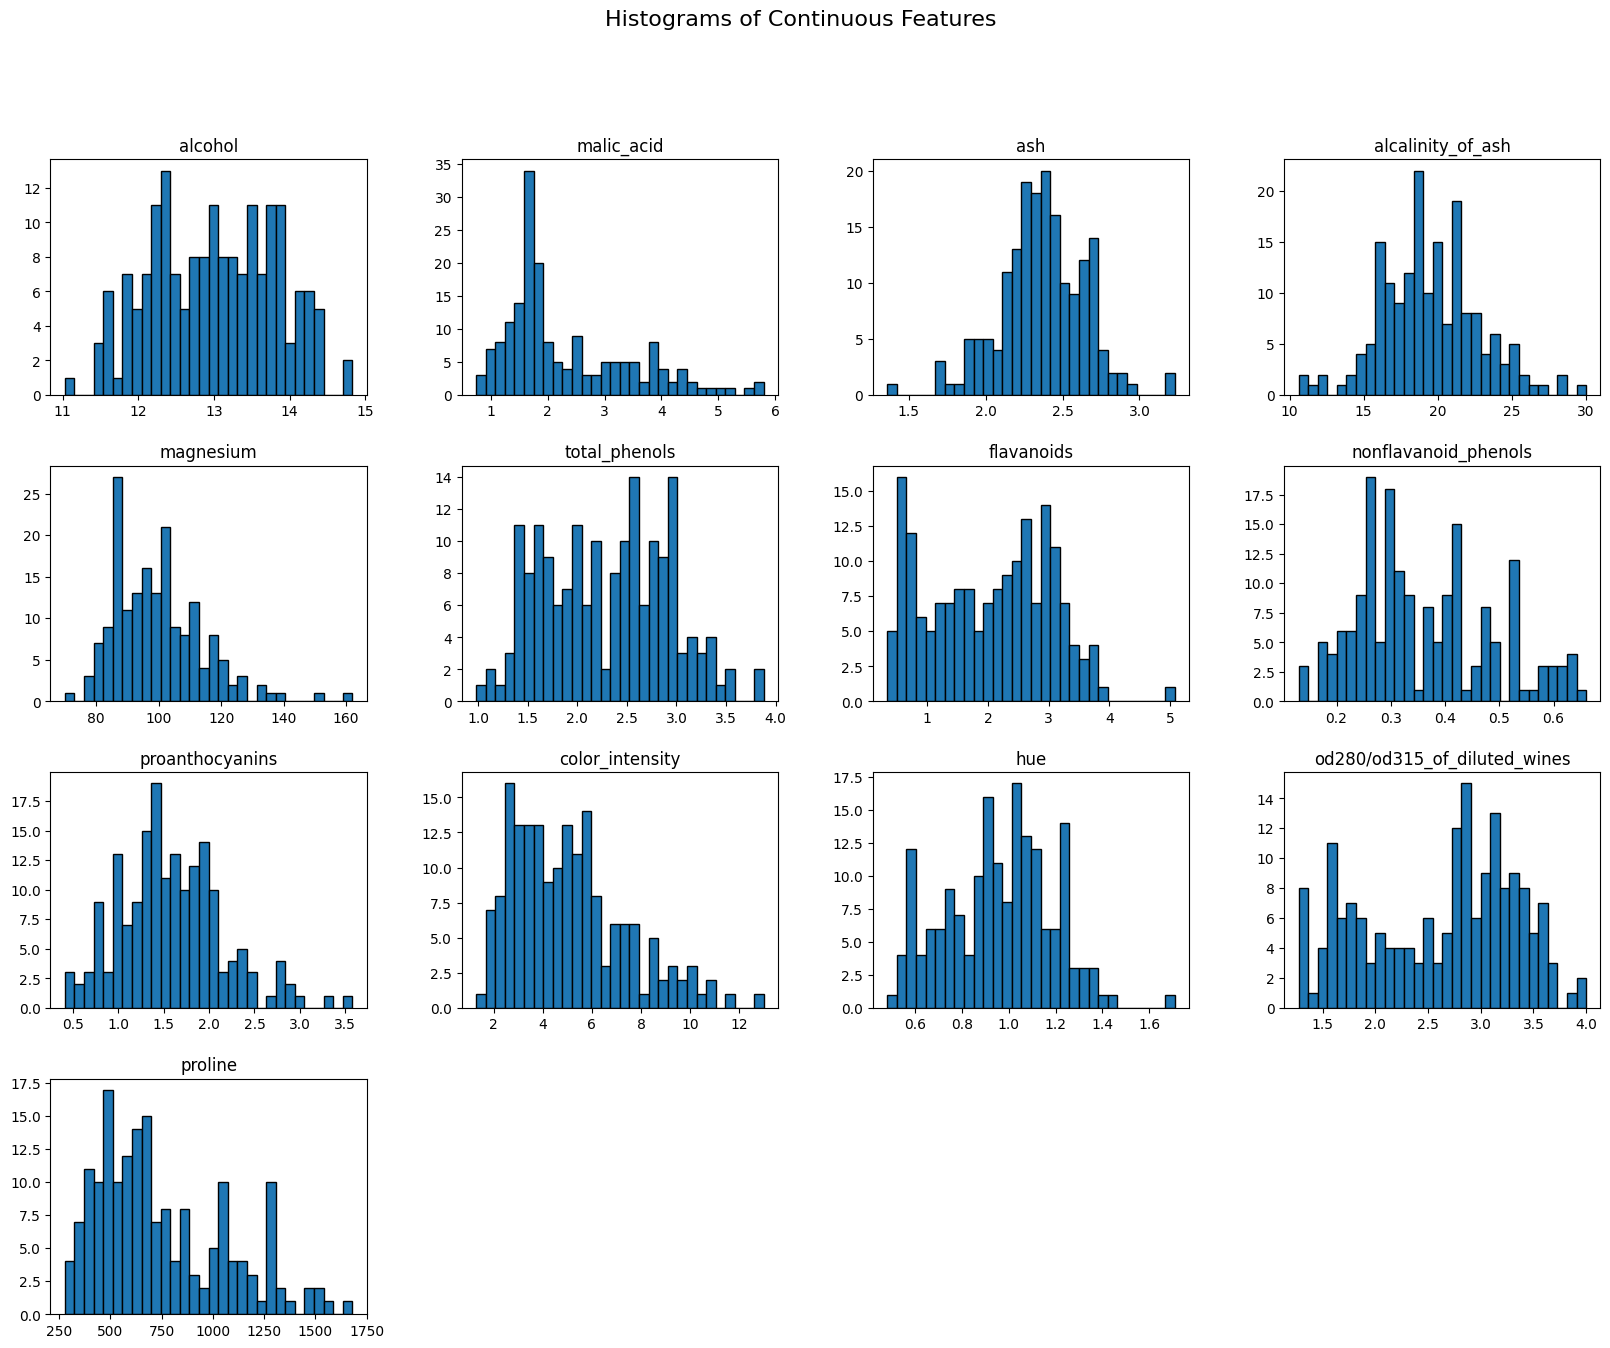

/var/folders/g_/prhyd75d67l6bnkn2vqq6r6h0000gn/T/ipykernel_6571/4041799320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_wine, palette='viridis')


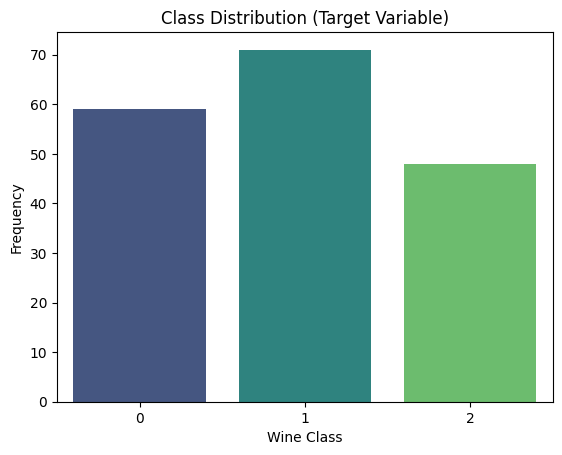

In [119]:
# Plot distributions of all features
df_wine.iloc[:, :-1].hist(bins=30, figsize=(20, 15), grid=False, edgecolor='black')
plt.suptitle("Histograms of Continuous Features", fontsize=16)
plt.show()

# Bar plot for the target variable
sns.countplot(x='target', data=df_wine, palette='viridis')
plt.title("Class Distribution (Target Variable)")
plt.xlabel("Wine Class")
plt.ylabel("Frequency")
plt.show()



Missing values in each column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


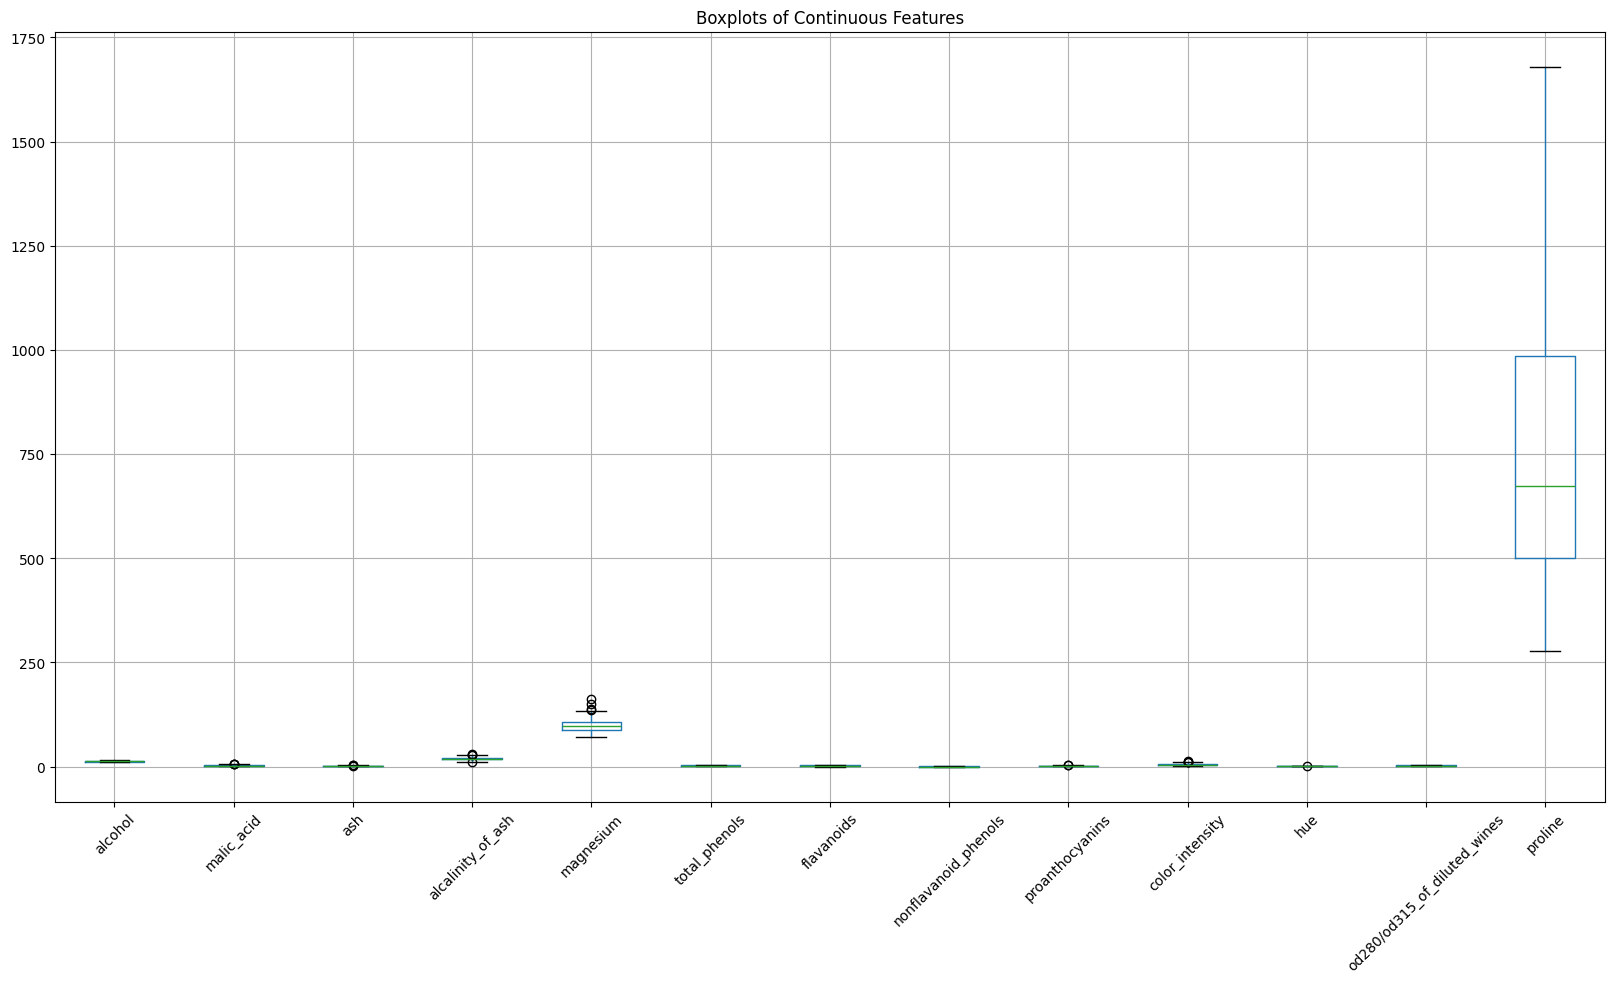

In [120]:
# Check for missing values
print("\nMissing values in each column:")
print(df_wine.isnull().sum())

# Check for outliers using boxplots
plt.figure(figsize=(20, 10))
df_wine.iloc[:, :-1].boxplot(rot=45)
plt.title("Boxplots of Continuous Features")
plt.show()


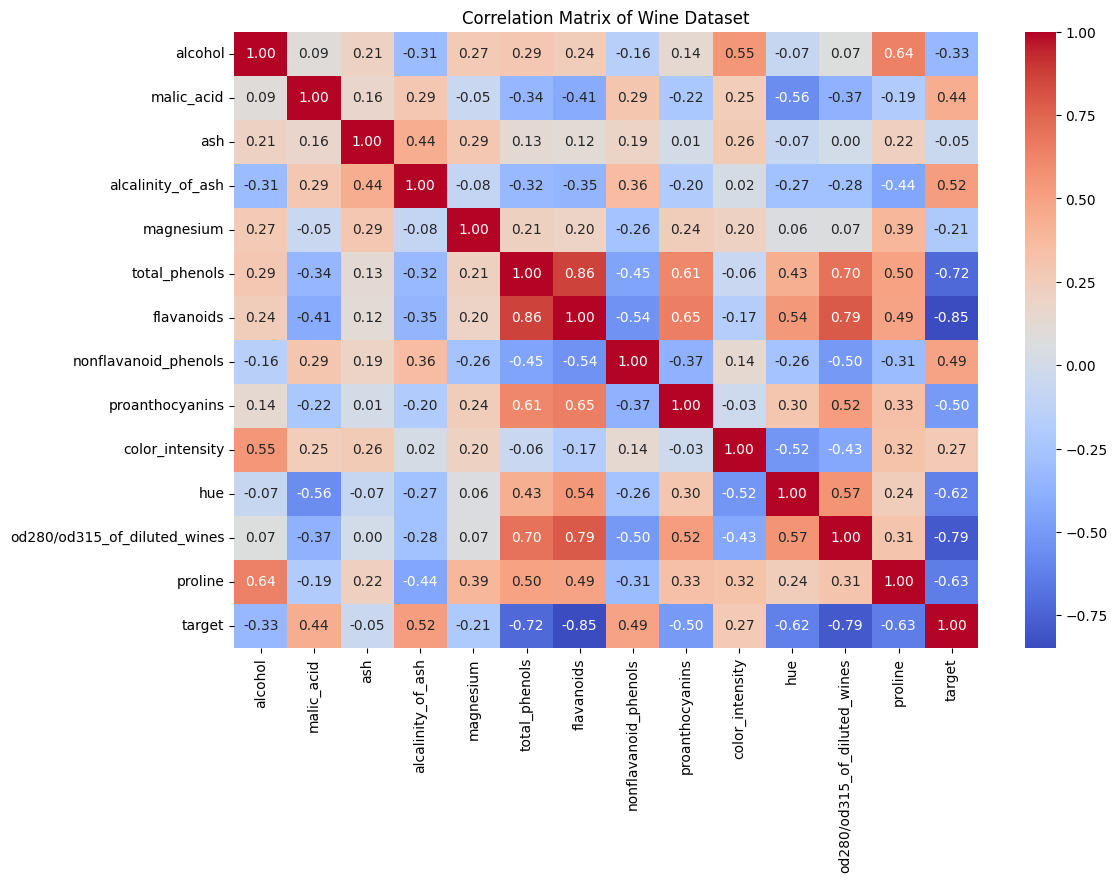


Correlations with target variable:
target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64


In [66]:
# Compute correlation matrix
corr_matrix = df_wine.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Wine Dataset")
plt.show()

# Correlations with the target variable
correlations_with_target = corr_matrix['target'].sort_values(ascending=False)
print("\nCorrelations with target variable:")
print(correlations_with_target)


In [67]:
# Min-Max Normalization
df_normalized = (df_wine.iloc[:, :-1] - df_wine.iloc[:, :-1].min()) / (df_wine.iloc[:, :-1].max() - df_wine.iloc[:, :-1].min())
df_normalized['target'] = df_wine['target']  # Add target back
print("\nNormalized dataset (first 5 rows):")
print(df_normalized.head())

# Z-Score Standardization
df_standardized = (df_wine.iloc[:, :-1] - df_wine.iloc[:, :-1].mean()) / df_wine.iloc[:, :-1].std()
df_standardized['target'] = df_wine['target']  # Add target back
print("\nStandardized dataset (first 5 rows):")
print(df_standardized.head())



Normalized dataset (first 5 rows):
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0         0.372014  0.455285                      0.970

In [68]:
# Save the normalized dataset
df_normalized.to_csv("wine_normalized.csv", index=False)

# Save the standardized dataset
df_standardized.to_csv("wine_standardized.csv", index=False)
